In [1]:
import pandas as pd
import numpy as np
import random as rn
import tensorflow as tf

df = pd.read_pickle('mnist_data.pkl')

train_labels = np.array([df['trainLabels']])
train_images = np.array([df['trainImages']])

test_images = np.array(df['testImages'])
test_labels = np.array([df['testLabels']])

SEED = 6
np.random.seed(SEED)
rn.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
# from keras import backend as K
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [2]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [4]:
img = []
for i in test_images:
    val = []
    k = 0
    for j in range(28):
        val.append(i[k:k+28])
        k += 28
    img.append(val)
test_images = np.array(img)
np.shape(img)

(200, 28, 28)

In [5]:
img = []
for i in train_images[0]:
    val = []
    k = 0
    for j in range(28):
        val.append(i[k:k+28])
        k += 28
    # print(np.shape(val))
    img.append(val)
train_images = np.array(img)

np.shape(train_images)

(800, 28, 28)

In [6]:
train_images = train_images.reshape(800,28,28,1)
test_images = test_images.reshape(200,28,28,1)

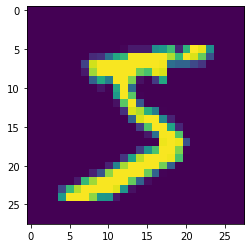

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img[0])


In [8]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train[0]


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, AveragePooling2D
from keras import regularizers
#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
#model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, kernel_size=3, activation='relu'))
# # model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.85))
model.add(Dense(10, activation='softmax'))

In [10]:
#compile model using accuracy to measure model performance

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#train the model
history = model.fit(train_images, y_train[0], validation_split=0.1, epochs=18)

Epoch 1/18
23/23 [==============================] - 3s 63ms/step - loss: 0.1738 - accuracy: 0.1236 - val_loss: 0.1850 - val_accuracy: 0.0750
Epoch 2/18
23/23 [==============================] - 1s 57ms/step - loss: 0.1724 - accuracy: 0.1347 - val_loss: 0.1850 - val_accuracy: 0.0750
Epoch 3/18
23/23 [==============================] - 1s 59ms/step - loss: 0.1677 - accuracy: 0.1583 - val_loss: 0.1850 - val_accuracy: 0.0750
Epoch 4/18
23/23 [==============================] - 1s 54ms/step - loss: 0.1725 - accuracy: 0.1375 - val_loss: 0.1850 - val_accuracy: 0.0750
Epoch 5/18
23/23 [==============================] - 1s 65ms/step - loss: 0.1738 - accuracy: 0.1292 - val_loss: 0.1850 - val_accuracy: 0.0750
Epoch 6/18
23/23 [==============================] - 1s 58ms/step - loss: 0.1724 - accuracy: 0.1361 - val_loss: 0.1827 - val_accuracy: 0.0875
Epoch 7/18
23/23 [==============================] - 1s 62ms/step - loss: 0.1723 - accuracy: 0.1375 - val_loss: 0.1725 - val_accuracy: 0.1375
Epoch 8/18
23

In [12]:
history.history

{'loss': [0.17377232015132904,
  0.1723741888999939,
  0.16771431267261505,
  0.17247329652309418,
  0.17377935349941254,
  0.1724165678024292,
  0.17225833237171173,
  0.17589698731899261,
  0.1770319938659668,
  0.1717853993177414,
  0.1736053079366684,
  0.1735931634902954,
  0.17021238803863525,
  0.165180042386055,
  0.15954162180423737,
  0.16076886653900146,
  0.16247472167015076,
  0.15996205806732178],
 'accuracy': [0.12361110746860504,
  0.13472221791744232,
  0.15833333134651184,
  0.13750000298023224,
  0.12916666269302368,
  0.13611111044883728,
  0.13750000298023224,
  0.11944444477558136,
  0.11249999701976776,
  0.14027777314186096,
  0.1319444477558136,
  0.1319444477558136,
  0.14861111342906952,
  0.1736111044883728,
  0.20000000298023224,
  0.1944444477558136,
  0.1875,
  0.20000000298023224],
 'val_loss': [0.1850000023841858,
  0.1849992573261261,
  0.1850000023841858,
  0.1850000023841858,
  0.1849977672100067,
  0.18271654844284058,
  0.17249999940395355,
  0.177

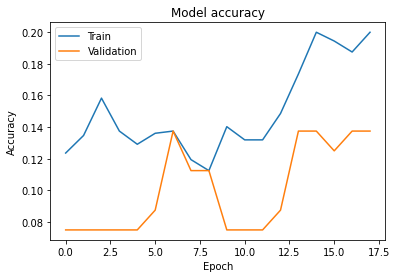

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

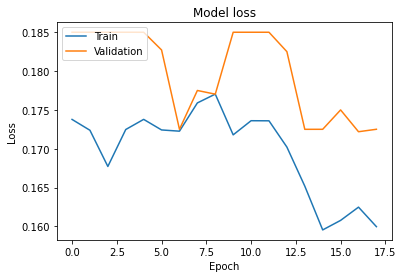

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [15]:
loss, accuracy = model.evaluate(test_images, y_test[0], verbose=1)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

7/7 [==============================] - 0s 13ms/step - loss: 0.1589 - accuracy: 0.2050
Test loss: 0.1589365452528
Test accuracy: 0.20499999821186066
